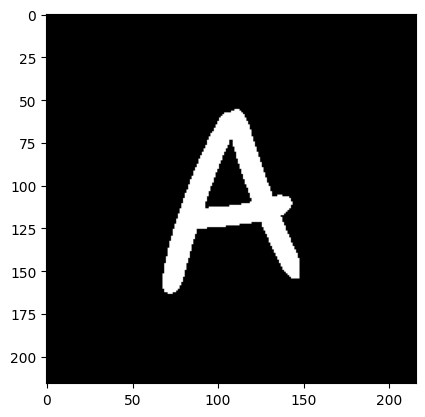

In [9]:
# thresholding

from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, color, morphology


def create_image(size, bgColor, message, font, fontColor):
    W, H = size
    image = Image.new('RGB', size, bgColor)
    draw = ImageDraw.Draw(image)
    _, _, w, h = draw.textbbox((0, 0), message, font=font)
    draw.text(((W-w)/2, 0), message, font=font, fill=fontColor)
    return image

image_size = 216
font_size = int(image_size * 0.9)

myFont = ImageFont.truetype('./fonts/NanumPenScript-Regular.ttf', font_size)
myMessage = 'A'
myImage = create_image((image_size, image_size), 'black', myMessage, myFont, 'white')
reference = np.array(myImage.convert("L"))
threshold = 180
binary = reference > threshold
thresholded = Image.fromarray(binary)


plt.imshow(thresholded)

In [30]:
def draw_font(size, message, font, fontColor):
    W, H = size
    image = Image.new('RGB', size, 'black')
    draw = ImageDraw.Draw(image)
    _, _, w, h = draw.textbbox((0, 0), message, font=font)
    draw.text(((W-w)/2, 0), message, font=font, fill=fontColor)
    return image

(216, 216)


/tmp/ipykernel_940/3256366954.py:17: UserWarning: connected_skeleton_image.png is a low contrast image
  io.imsave('connected_skeleton_image.png', change_false_to_true.astype(np.uint8) * 255)


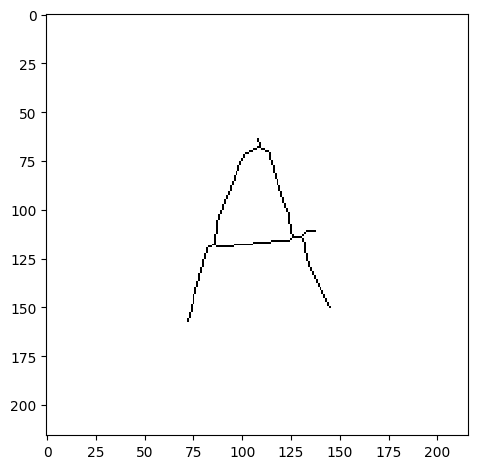

In [27]:
# Convert the Pillow image to a NumPy array
numpy_image = np.array(myImage.convert("L"))
print(numpy_image.shape)

# Load your binary image (make sure it's binary)
# binary_image = io.imread(numpy_image, as_gray=True)

# Apply binary thresholding if not already binary
# binary_image = (binary_image > 0.5).astype(bool)

# Perform skeletonization using the Zhang-Suen thinning algorithm
skeleton = morphology.skeletonize(numpy_image)

change_false_to_true = np.logical_not(skeleton)
# Save the connected skeletonized image

io.imsave('connected_skeleton_image.png', change_false_to_true.astype(np.uint8) * 255)
io.imshow(change_false_to_true)


# Display the connected skeletonized image
# image = Image.fromarray(change_false_to_true.astype(np.uint8) * 255)
# io.imshow(change_false_to_true.astype(np.uint8) * 255)
# io.show()

In [43]:
from fontTools.ttLib import TTFont
from PIL import Image, ImageDraw, ImageFont
import numpy as np

def draw_glyphs(ttf_file_path, output_folder, image_size=216):
    font = TTFont(ttf_file_path)
    cmap = font.getBestCmap()
    font_path = ttf_file_path

    for ch, name in cmap.items():
        img = Image.new('RGB', (image_size, image_size), color='white')
        draw = ImageDraw.Draw(img)
        font_size = int(image_size * 0.9)
        font = ImageFont.truetype(font_path, font_size)
        hex = "{:04X}".format(ch)
        hex_val = "0x" + hex
        code = int(hex_val, 16)
        char = chr(code)
        if code == 0:
            continue
        if name == 'uni0001':
            continue

        _, _, w, h = draw.textbbox((0, 0), char, font=font)
        draw.text(((image_size-w)/2, 0), char, font=font, fill="black")

        # check if anything was drawn
        if np.array(img).sum() == 255 * image_size * image_size * 3:
            print(f"Skipping empty glyph for code {code}")
            continue

        output_file = f"{output_folder}/glyph_{code}.png"
        img.save(output_file)


# Replace 'your_font_file.ttf' with the path to your TTF font file
# Replace 'output_folder' with the folder where you want to save the images
font_path = './fonts/NanumPenScript-Regular.ttf'
output_folder = './data/fonts/test/a'

draw_glyphs(font_path, output_folder)

35691840
Drawing glyph for code !
35691840
Drawing glyph for code "
35691840
Drawing glyph for code #
35691840
Drawing glyph for code $
35691840
Drawing glyph for code %
35691840
Drawing glyph for code &
35691840
Drawing glyph for code '
35691840
Drawing glyph for code (
35691840
Drawing glyph for code )
35691840
Drawing glyph for code *
35691840
Drawing glyph for code +
35691840
Drawing glyph for code ,
35691840
Drawing glyph for code -
35691840
Drawing glyph for code .
35691840
Drawing glyph for code /
35691840
Drawing glyph for code 0
35691840
Drawing glyph for code 1
35691840
Drawing glyph for code 2
35691840
Drawing glyph for code 3
35691840
Drawing glyph for code 4
35691840
Drawing glyph for code 5
35691840
Drawing glyph for code 6
35691840
Drawing glyph for code 7
35691840
Drawing glyph for code 8
35691840
Drawing glyph for code 9
35691840
Drawing glyph for code :
35691840
Drawing glyph for code ;
35691840
Drawing glyph for code <
35691840
Drawing glyph for code =
35691840
Drawi

In [2]:
# change the extracted to skeleton
import os
import numpy as np
from skimage import io, color, morphology

def skeletonize_image(image_path):
    # Load your binary image (make sure it's binary)
    binary_image = io.imread(image_path, as_gray=True)

    # Apply binary thresholding if not already binary
    binary_image = (binary_image < 0.5).astype(bool)

    # Perform skeletonization using the Zhang-Suen thinning algorithm
    skeleton = morphology.skeletonize(binary_image)

    skeleton = np.logical_not(skeleton)

    # Save the connected skeletonized image
    # io.imsave('connected_skeleton_image.png', skeleton.astype(np.uint8) * 255)

    return skeleton.astype(np.uint8) * 255

    # Display the connected skeletonized image
    # io.imshow(skeleton.astype(np.uint8) * 255, cmap='gray')

# Replace 'your_image_file.png' with the path to your image file
# image_path = './data/fonts/test/a/glyph_65.png'
# skeletonize_image(image_path)


In [3]:
# change the extracted to skeleton
import os
import numpy as np
from skimage import io, color, morphology

files = os.listdir('./data/fonts/test/a')

for file in files:
    skeleton = skeletonize_image('./data/fonts/test/a/' + file)

    # Save the connected skeletonized image
    io.imsave('./data/fonts/test/b/' + file, skeleton)

    # Display the connected skeletonized image
    # io.imshow(skeleton.astype(np.uint8) * 255, cmap='gray')
    # io.show()

/tmp/ipykernel_37106/3070691754.py:12: UserWarning: ./data/fonts/test/b/glyph_49523.png is a low contrast image
  io.imsave('./data/fonts/test/b/' + file, skeleton)
/tmp/ipykernel_37106/3070691754.py:12: UserWarning: ./data/fonts/test/b/glyph_47520.png is a low contrast image
  io.imsave('./data/fonts/test/b/' + file, skeleton)
/tmp/ipykernel_37106/3070691754.py:12: UserWarning: ./data/fonts/test/b/glyph_46330.png is a low contrast image
  io.imsave('./data/fonts/test/b/' + file, skeleton)
/tmp/ipykernel_37106/3070691754.py:12: UserWarning: ./data/fonts/test/b/glyph_44763.png is a low contrast image
  io.imsave('./data/fonts/test/b/' + file, skeleton)
/tmp/ipykernel_37106/3070691754.py:12: UserWarning: ./data/fonts/test/b/glyph_51318.png is a low contrast image
  io.imsave('./data/fonts/test/b/' + file, skeleton)
/tmp/ipykernel_37106/3070691754.py:12: UserWarning: ./data/fonts/test/b/glyph_48661.png is a low contrast image
  io.imsave('./data/fonts/test/b/' + file, skeleton)
/tmp/ipyke

In [8]:
from fontTools.ttLib import TTFont
import os

def get_supported_glyphs(ttf_file_path):
    font = TTFont(ttf_file_path)
    supported_glyphs = []

    for table in font['cmap'].tables:
        for code, name in table.cmap.items():
            supported_glyphs.append(name)

    return supported_glyphs

# Replace 'your_font_file.ttf' with the path to your TTF font file
font_path = './fonts/NanumPenScript-Regular.ttf'
supported_glyphs = get_supported_glyphs(font_path)

print("Supported Glyphs:")

# make directory
os.makedirs('./data/fonts', exist_ok=True)
os.makedirs('./data/fonts/test', exist_ok=True)

count = 0
for glyph in supported_glyphs:
    # draw font
    # draw_font((image_size, image_size), glyph, myFont, 'white').save('./data/fonts/test/' + str(count) + '.png')
    if len(glyph) > 1:
        continue
    # print(glyph)
    count += 1

print(count)

uni0001
uni0001
uni0001
uni0001
uni0001
uni0001
uni0001
uni0001
uni0001
uni0001
uni0001
uni0001
uni0001
uni0001
uni0001
uni0001
uni0001
uni0001
uni0001
uni0001
uni0001
uni0001
uni0001
uni0001
uni0001
uni0001
uni0001
uni0001
uni0001
uni0001
uni0001
uni0001
uni0001
exclam
quotedbl
numbersign
dollar
percent
ampersand
quotesingle
parenleft
parenright
asterisk
plus
comma
hyphen
period
slash
zero
one
two
three
four
five
six
seven
eight
nine
colon
semicolon
less
equal
greater
question
at
A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
Z
bracketleft
backslash
bracketright
asciicircum
underscore
grave
a
b
c
d
e
f
g
h
i
j
k
l
m
n
o
p
q
r
s
t
u
v
w
x
y
z
braceleft
bar
braceright
asciitilde
uni0001
exclamdown
cent
sterling
currency
yen
section
dieresis
copyright
ordfeminine
guillemotleft
logicalnot
uni00AD
registered
degree
plusminus
uni00B2
uni00B3
acute
paragraph
periodcentered
cedilla
uni00B9
ordmasculine
guillemotright
onequarter
onehalf
threequarters
questiondown
Eth
multiply
Oslash
Thorn
g